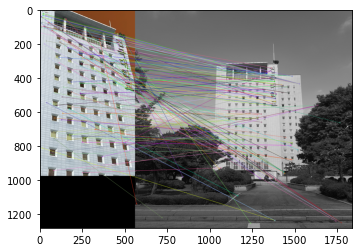

[('Images/test/16_5.jpeg', 145)]


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
import os


img_list = glob.glob('Images/test/16_5.jpeg')

result = {}

for i in range(len(img_list)):
    img1 = cv2.imread('Images/query/query_16_1.png')          # queryImage
    img2 = cv2.imread(f'{img_list[i]}',0) # trainImage

    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()

    matches = bf.knnMatch(des1,des2, k=2)
    good = []

    for m,n in matches:
        if m.distance < 0.8*n.distance:
            good.append([m])
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
    result[img_list[i]]=len(good)
    plt.imshow(img3),plt.show()
    cv2.imshow("comapre", img3)
    cv2.waitKey(1)
    
result = sorted(result.items(), key=(lambda x:x[1]), reverse=True)
print(result)



In [73]:
def get_sift_match(query, img):
    
    result = {}
    
    for q in query:
        img1 = cv2.imread(img)
        img2 = cv2.imread(q)
        
        sift = cv2.xfeatures2d.SIFT_create()
        kp1, des1 = sift.detectAndCompute(img1,None)
        kp2, des2 = sift.detectAndCompute(img2,None)
        bf = cv2.BFMatcher()
        
        matches = bf.knnMatch(des1,des2, k=2)
        good = []

        for m,n in matches:
            if m.distance < 0.8*n.distance:
                good.append([m])
        img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
        result[q]=len(good)
        
    result = sorted(result.items(), key=(lambda x:x[1]), reverse=True)
    #print(result)
    return str(next(iter(result))).split('.')[0].split('_')[1]
    

In [75]:
qs = glob.glob('Images/query/*.png')
test_images = glob.glob('Images/test2/*.jpeg')

count = 0

for i in test_images:
    res = get_sift_match(qs,i)
    source = i.split('/')[2].split('_')[0]
    print(source,res)
    if res == source:
        count=count+1
    

print(count)
    

21 22
16 16
22 22
17 17
8 16
8 8
8 8
17 17
16 17
21 21
21 21
16 16
16 16
17 17
17 17
8 8
16 16
16 16
21 16
16 16
16 16
21 21
16 16
16 16
16 16
22 21
16 16
21 16
8 8
22 22
16 16
25


In [76]:
print(count/len(test_images))

0.8064516129032258


In [77]:
len(test_images)

31

In [67]:
qs = glob.glob('Images/query/*.png')
test_img = 'Images/test/16_15.jpeg'

get_sift_match(qs, test_img)



[('Images/query/query_16_2.png', 103), ('Images/query/query_17.png', 80), ('Images/query/query_21.png', 74), ('Images/query/query_8.png', 69), ('Images/query/query_22.png', 66), ('Images/query/query_16.png', 61), ('Images/query/query_16_1.png', 53)]


'16'

In [68]:
test_img = 'Images/test/16_16.jpeg'

get_sift_match(qs, test_img)



[('Images/query/query_16_2.png', 114), ('Images/query/query_17.png', 83), ('Images/query/query_21.png', 80), ('Images/query/query_8.png', 76), ('Images/query/query_16.png', 65), ('Images/query/query_22.png', 65), ('Images/query/query_16_1.png', 48)]


'16'

In [69]:
test_img = 'Images/test/16_17.jpeg'

get_sift_match(qs, test_img)



[('Images/query/query_16_2.png', 1302), ('Images/query/query_21.png', 249), ('Images/query/query_17.png', 227), ('Images/query/query_16_1.png', 220), ('Images/query/query_8.png', 200), ('Images/query/query_22.png', 191), ('Images/query/query_16.png', 185)]


'16'

In [70]:
test_img = 'Images/test/8_11.jpeg'

get_sift_match(qs, test_img)



[('Images/query/query_8.png', 2163), ('Images/query/query_21.png', 153), ('Images/query/query_16_2.png', 111), ('Images/query/query_16.png', 106), ('Images/query/query_22.png', 105), ('Images/query/query_16_1.png', 85), ('Images/query/query_17.png', 72)]


'8'

In [1]:
test_img = 'Images/test/16_16.jpeg'

get_sift_match(qs, test_img)
 
#test

NameError: name 'get_sift_match' is not defined

In [ ]:
#지금부터 하루 하나씩 커밋을 하지 않으면 큰 화를 입을